In [1]:
import numpy as np

### Define Neural Network Class

In [2]:
class NeuronNetworkLayer:
  # Initializer / Instance Attributes
  def __init__(self, num_input, num_output,activation, initial_gain):
      np.random.seed(42)
      self.inputs = []
      self.outputs = []
      self.weights = np.random.rand(num_output, num_input)*initial_gain
      self.bias = np.random.rand(num_output)* initial_gain
      self.activation = activation

  def sigmoid(self, x):
    output = 1/(1+np.exp(-x))
    return output

  def relu(self, x):
    output = np.where(x > 0, x, 0)
    return output

  def forward(self, input):
    # calculate forward propagation of layer then store in and return self.outputs
    self.inputs = np.array(input)
    # y = Theta1 * x1 + Theta2 * x2 + ... + bias
    outputs = np.dot(self.inputs, self.weights.T) + self.bias
    # outputs = activation(y) // Non-linearization
    if self.activation == 'sigmoid':
      self.outputs = self.sigmoid(outputs)
    elif self.activation == 'relu':
      self.outputs = self.relu(outputs)
    elif self.activation == 'linear':
      self.outputs = outputs
    return self.outputs

  def backprop(self, incoming_gradients, learning_rate):
    # Calculate gradient of Loss with respect to weights, biases and inputs.
    # Use the gradients to update the weights and biases.
    # Return the input_gradients for use in the next layer.
    input_gradients = 0

    if self.activation == 'sigmoid':
      gard_sig = self.outputs * (1-self.outputs)
      # Chain rule
      before_update = incoming_gradients * gard_sig
    elif self.activation == 'relu':
      gard_relu = np.where(self.outputs > 0, 1, 0)
      # Chain rule
      before_update = incoming_gradients * gard_relu
    elif self.activation == 'linear':
      before_update = np.array(incoming_gradients)

    input_gradients = np.dot(self.weights.T, before_update)

    # update weights and bias
    self.weights -= learning_rate * np.outer(before_update, self.inputs)
    self.bias -= learning_rate * before_update

    return input_gradients

In [3]:
class NeuralNetwork:
  def __init__(self):
      self.layers = []
      self.output = None

  def add_layer(self, nn_layer):
    # Add layer to neural network
    self.layers.append(nn_layer)

  def forward(self, input):
    # Do forward propagation through entire neural network
    # Calculate and return the final layer_output
    y = input
    for layer in self.layers:
      y = layer.forward(y)
    return y

  def loss(self, output, target):
    loss = (output - target)**2
    return loss/2

  def loss_derivative(self, output, target):
    dLoss = output - target
    return dLoss

  def backward(self, dLoss, learning_rate):
    # Perform backpropagtion though entire neural network
    # Return the input_gradients in the last layer
    input_gradients = dLoss
    for layer in reversed(self.layers):
      input_gradients = layer.backprop(input_gradients, learning_rate)
    return input_gradients

  def train(self, iterations, train_x, train_y, learning_rate, print_every):
    # Train the neural network
    for i in range(iterations):
      total_loss=0
      for row_x, row_y in zip(train_x, train_y):
        self.output = self.forward(row_x)
        loss = self.loss(self.output, row_y)
        dLoss = self.loss_derivative(self.output, row_y)
        total_loss = total_loss + loss

        self.backward(dLoss, learning_rate)

      if i%print_every==0:
        print('total_loss', sum(total_loss))

    return total_loss

### Testing with Logic Gates

In [4]:
nn_model = NeuralNetwork()
nn_model.add_layer(NeuronNetworkLayer(2,5, 'sigmoid', 0.01))
nn_model.add_layer(NeuronNetworkLayer(5,10, 'sigmoid', 0.01))
nn_model.add_layer(NeuronNetworkLayer(10,1, 'sigmoid', 0.01))

In [5]:
train_x = np.array([ [1,1], [1,0], [0,1], [0,0]])
train_y = np.array([[1], [0], [0], [0] ])

total_loss = nn_model.train(2000, train_x, train_y, 0.7, 500)

total_loss 0.5018283341189989
total_loss 0.3809452141387508
total_loss 0.017417753126093186
total_loss 0.0024965958490738814


In [6]:
# for AND gate an input of [1,1] should give output of 1
print("Logic 1 AND 1:", nn_model.forward(np.array([1,1])))
# for AND gate an input of [1,0] should give output of 0
print("Logic 1 AND 0:", nn_model.forward(np.array([1,0])))

Logic 1 AND 1: [0.96039223]
Logic 1 AND 0: [0.01985697]


### Predict linear and polynomial function

In [12]:
import matplotlib.pyplot as plt

def plotXY(x1,y1,x2,y2):
  plt.figure(figsize=(8, 4))
  plt.plot(x1, y1, label='Line 1', color='blue', linestyle='-', marker='o')
  plt.plot(x2, y2, label='Line 2', color='red', linestyle='--', marker='x')
  plt.title('X-Y Plot with Two Lines')

  plt.xlabel('X axis label')
  plt.ylabel('Y axis label')

  plt.legend()
  plt.show()

In [13]:
# Model for predict linear function
nn_model = NeuralNetwork()
nn_model.add_layer(NeuronNetworkLayer(1, 1, 'linear', 0.1))

In [14]:
train_x = np.linspace(-10, 10, 20)
train_y = train_x*2+3

train_x = np.array([[item] for item in train_x])
train_y = np.array([[item] for item in train_y])

total_loss = nn_model.train(50, train_x, train_y, 0.01, 10)

total_loss 196.7233437279094
total_loss 4.174598096335596
total_loss 0.22795857013356088
total_loss 0.012447931153648258
total_loss 0.0006797331195544107


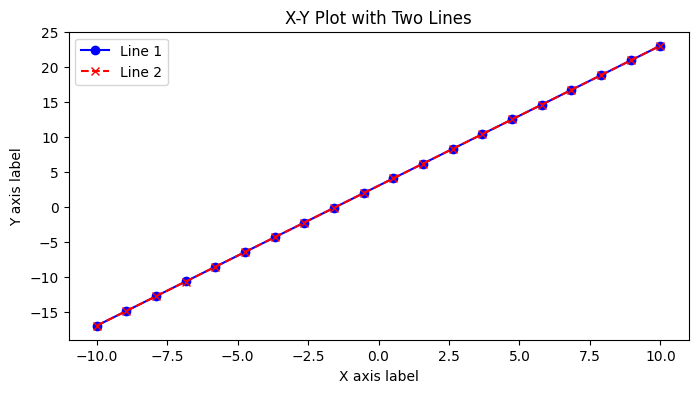

In [15]:
forward_result = []
for x in train_x:
  forward = nn_model.forward(x)
  forward_result.append(forward)
forward_result

plotXY(train_x, train_y, train_x, forward_result )

In [16]:
# Model for preict polynomial function
nn_model = NeuralNetwork()
nn_model.add_layer(NeuronNetworkLayer(1, 16, 'sigmoid', 0.01))
nn_model.add_layer(NeuronNetworkLayer(16, 1, 'linear', 0.1))

In [17]:
train_x = np.linspace(-10, 10, 40)
train_y = train_x*train_x*2+3*train_x+3

train_x = np.array([[item] for item in train_x])
train_y = np.array([[item] for item in train_y])

total_loss = nn_model.train(10000, train_x, train_y, 2.5e-4, 1000)

total_loss 184461.7024096117
total_loss 2015.470793936382
total_loss 821.0736281918423
total_loss 381.90290585447525
total_loss 659.1091634639673
total_loss 491.02488859516325
total_loss 420.841565328433
total_loss 292.6505570176172
total_loss 87.10748610110238
total_loss 76.6993983909446


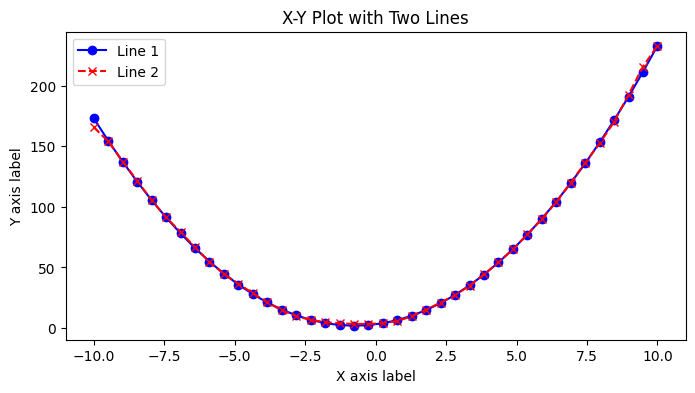

In [18]:
train_x_prediction = []
for x in train_x:
  forward_result = nn_model.forward(x)
  train_x_prediction.append(forward_result)

train_x_prediction

plotXY(train_x, train_y, train_x, train_x_prediction )

### Simple classification

In [19]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Convert to DataFrame for easier manipulation
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
species_mapping = dict(zip(range(3), iris.target_names))
iris_df['species'] = iris_df['species'].map(species_mapping)

In [21]:
# One-hot encode the 'species' column
species_encoded = pd.get_dummies(iris_df['species'], prefix='species')
iris_df_encoded = pd.concat([iris_df.drop('species', axis=1), species_encoded], axis=1)
train_y = species_encoded.to_numpy()

iris_df_encoded.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_setosa,species_versicolor,species_virginica
116,6.5,3.0,5.5,1.8,False,False,True
42,4.4,3.2,1.3,0.2,True,False,False
90,5.5,2.6,4.4,1.2,False,True,False
60,5.0,2.0,3.5,1.0,False,True,False
114,5.8,2.8,5.1,2.4,False,False,True


In [22]:
df_x = iris_df_encoded.drop(['species_setosa', 'species_versicolor', 'species_virginica'], axis=1).to_numpy()
df_y = iris_df_encoded[['species_setosa', 'species_versicolor', 'species_virginica']].to_numpy()

In [23]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=0.3, random_state=42)
print(train_x.shape, train_y.shape)

(105, 4) (105, 3)


In [27]:
# Model for Classification
nn_model = NeuralNetwork() # To make this more make sense, change MSEloss to CrossEntropyLoss and Final layer to softmax
nn_model.add_layer(NeuronNetworkLayer(4, 48, 'relu', 0.01))
nn_model.add_layer(NeuronNetworkLayer(48, 32, 'relu', 0.01))
nn_model.add_layer(NeuronNetworkLayer(32, 8, 'relu', 0.01))
nn_model.add_layer(NeuronNetworkLayer(8, 3, 'sigmoid', 0.1))

total_loss = nn_model.train(2000, train_x, train_y, 0.005, 200)

total_loss 39.91270163920892
total_loss 34.89389408326427
total_loss 34.893063201132435
total_loss 34.89002188388195
total_loss 34.83901723774145
total_loss 18.560519190401493
total_loss 11.293708784766057
total_loss 3.9603502113184073
total_loss 2.7221118203705075
total_loss 2.6348439648215853


In [28]:
def prediction_accuracy(nn_model, train_x, train_y):

  correct=0
  for i in range(len(train_x)):
    prediction = nn_model.forward(train_x[i])
    prediction_index = np.argmax(prediction)
    y_label = np.argmax(train_y[i])
    if y_label == prediction_index:
      correct=correct+1

  return correct/len(train_y)

In [29]:
train_accuracy = prediction_accuracy(nn_model, train_x, train_y)
train_accuracy

0.9714285714285714

In [30]:
test_accuracy = prediction_accuracy(nn_model, test_x, test_y)
test_accuracy

0.9777777777777777